<a href="https://colab.research.google.com/github/2303A51163/ADM-Lab/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIM:
### To Implement Linear regression using python and apply it to the Baston housing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
california=fetch_california_housing()
data=pd.DataFrame(california.data,columns=california.feature_names)
data['PRICE']=california.target

In [ ]:
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


# Step 2: Preprocessing &Spltting data

In [ ]:
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [ ]:
x=data.drop('PRICE',axis=1)
y=data['PRICE']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error:0.56
R2 Score: 0.58


In [ ]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
y_test

,PRICE
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


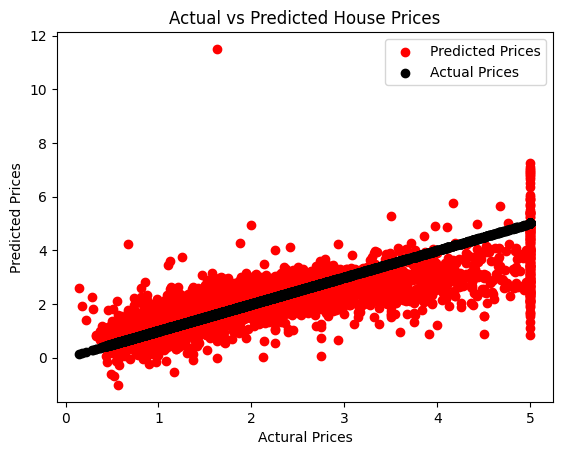

In [ ]:
plt.scatter(y_test,y_pred,color='red',label='Predicted Prices')
plt.scatter(y_test,y_test,color='black',label='Actual Prices')
plt.xlabel("Actural Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()